In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr as pr

In [3]:
dffrac_pro = pd.read_csv('../Results/protein_abundance_go_slim_level_uniq_asc.csv', index_col=0)

dffrac_mRNA = pd.read_excel('../proteomics/mRNA_abundance_go_slim-20201124.xlsx', sheet_name='mRNA', index_col=0,
                            header=0)

In [4]:
def extract_one_GoSlim(dffrac_pro,dffrac_mRNA, goID):
    sel_cols = [col for col in dffrac_mRNA.columns if 'MassFrac' in col]
    mrna = dffrac_mRNA.loc[goID,sel_cols]
    prot = dffrac_pro.loc[goID, sel_cols]
    
    return mrna,prot,sel_cols

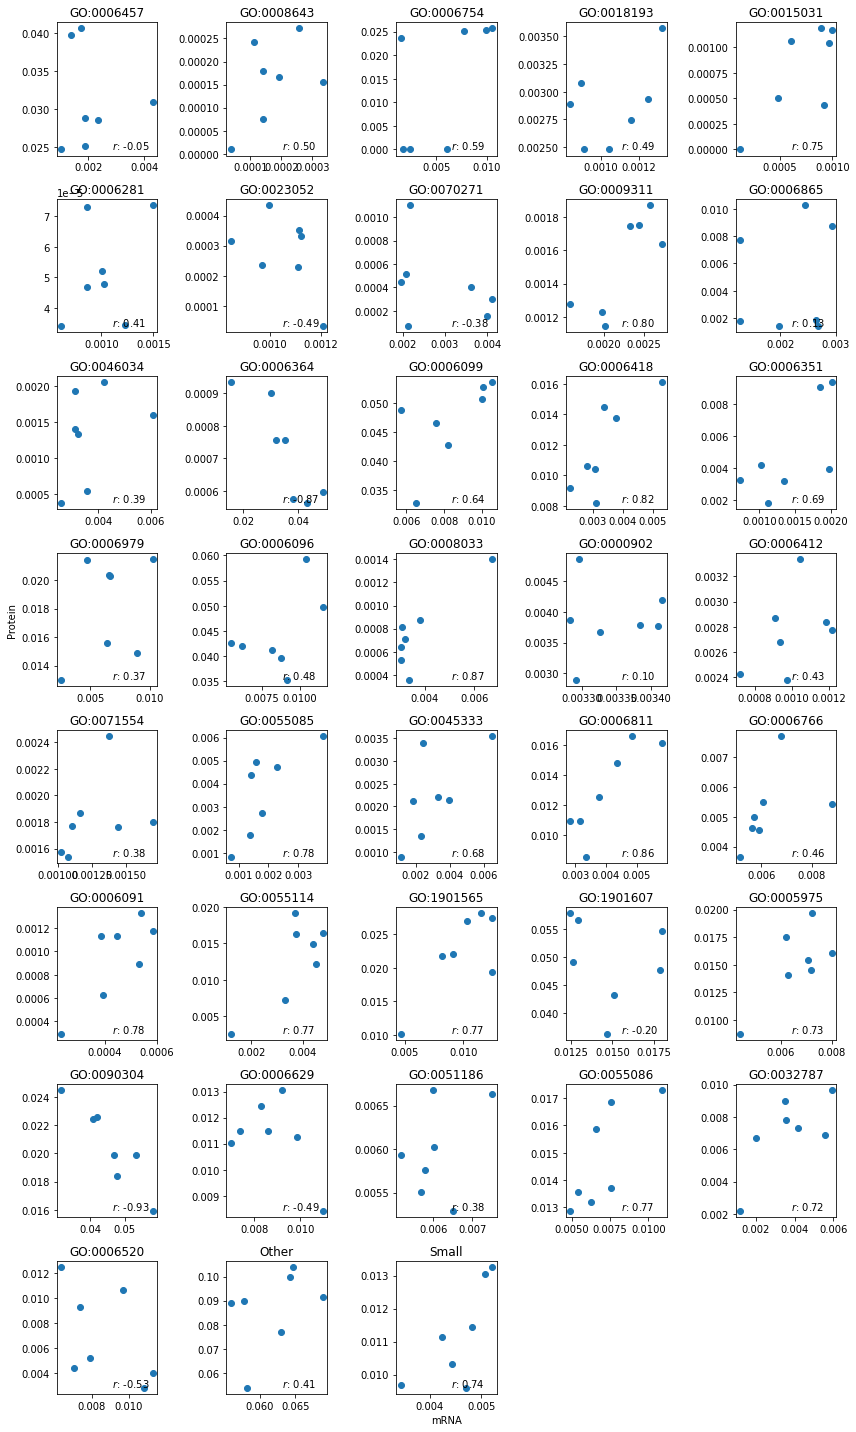

In [25]:
rs = []
plt.figure(figsize=(12,20))
for i,goID in enumerate(dffrac_mRNA.index):
    plt.subplot(8,5,i+1)
    mrna,prot,sel_cols = extract_one_GoSlim(dffrac_pro,dffrac_mRNA, goID)
    plt.scatter(mrna,prot)
    
    rgx = plt.xlim()[1]-plt.xlim()[0]
    rgy = plt.ylim()[1]-plt.ylim()[0]
    plt.text(plt.xlim()[0]+rgx*0.55, plt.ylim()[0]+rgy*0.05, "$r$: %.2f" % pr(mrna,prot)[0])
    rs.append(pr(mrna,prot)[0])
    plt.title('{0}'.format(goID))
    
    if i == 15: plt.ylabel('Protein')
    if i == 37: plt.xlabel('mRNA')
    
    #plt.xticks([])
    #plt.yticks([])
plt.tight_layout()
plt.savefig('../figures/mRNA_vs_prot_within_GoSlim_across_conditions.pdf')
plt.show()

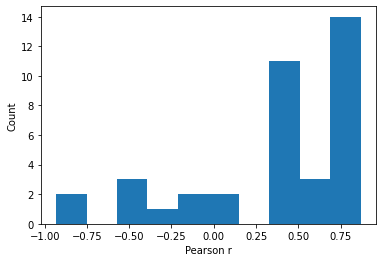

In [27]:
plt.hist(rs)
plt.xlabel('Pearson r')
plt.ylabel('Count')
plt.show()